<a href="https://colab.research.google.com/github/Nirpanthan/datascience/blob/main/Stock_Market_Comparison_Analysis_and%20profit_using_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
pip install yfinance

In [52]:
import pandas as pd
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
pio.templates.default = "plotly_white"

In [53]:
# Define the tickers for TCS and Infosys
tcs_ticker = 'TCS'
infosys_ticker = 'INFY'

# Define the date range for the Half
start_date = '2023-07-01'
end_date = '2024-02-01'
tcs_data = yf.download(tcs_ticker, start=start_date, end=end_date)
infosys_data = yf.download(infosys_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [90]:
tcs_data['Total_Shares'] = tcs_data['Position'].cumsum()+150
#infosys_data['Total Shares_infosys']= infosys_data['Position'].cumsum()

In [91]:
tcs_data['Profit'] = tcs_data['Total_Shares'] * tcs_data['Close']

In [92]:
max_profit = tcs_data['Profit'].max()

print(f"Maximum Profit: {max_profit}")

Maximum Profit: 550.5000114440918


In [93]:
max_profit_date = tcs_data['Profit'].idxmax()
max_profit_close = tcs_data['Close'][max_profit_date]

print(f"Date of Maximum Profit: {max_profit_date}")
print(f"Closing Price at Maximum Profit: {max_profit_close}")

Date of Maximum Profit: 2023-08-01 00:00:00
Closing Price at Maximum Profit: 3.6700000762939453


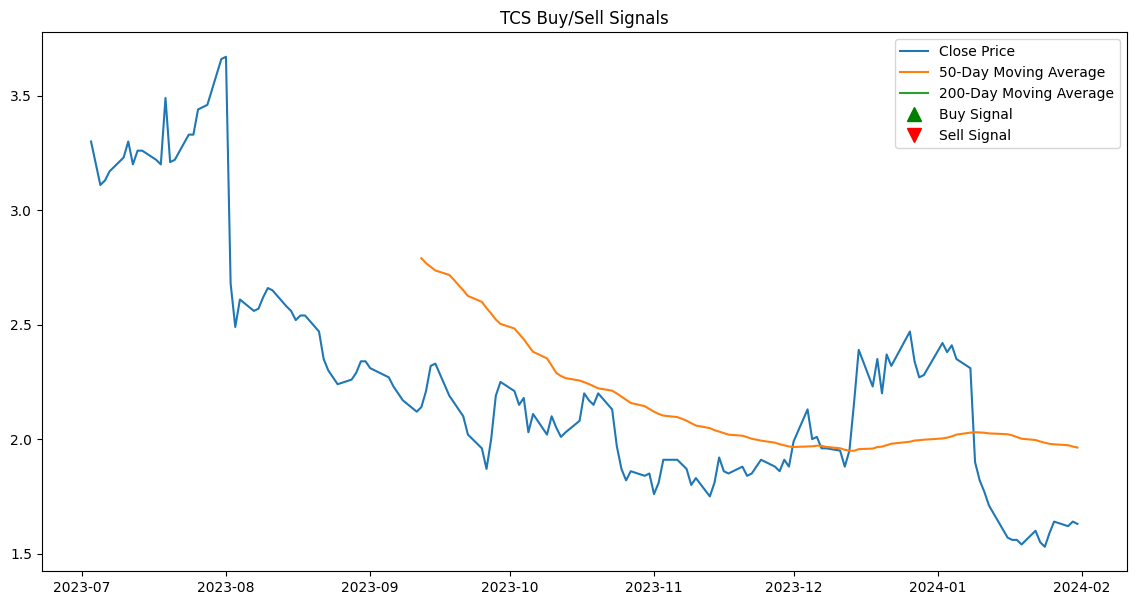

In [69]:
# Calculate the 50-day and 200-day moving averages
tcs_data['MA50'] = tcs_data['Close'].rolling(window=50).mean()
tcs_data['MA200'] = tcs_data['Close'].rolling(window=200).mean()

# Initialize signals column
tcs_data['Signal'] = 0

# Generate buy signals
tcs_data.loc[tcs_data['MA50'] > tcs_data['MA200'], 'Signal'] = 1

# Generate sell signals
tcs_data.loc[tcs_data['MA50'] < tcs_data['MA200'], 'Signal'] = -1

# Plot the buy and sell signals
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(tcs_data['Close'], label='Close Price')
plt.plot(tcs_data['MA50'], label='50-Day Moving Average')
plt.plot(tcs_data['MA200'], label='200-Day Moving Average')
plt.plot(tcs_data[tcs_data['Signal'] == 1].index,
         tcs_data['MA50'][tcs_data['Signal'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(tcs_data[tcs_data['Signal'] == -1].index,
         tcs_data['MA50'][tcs_data['Signal'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('TCS Buy/Sell Signals')
plt.legend()
plt.show()


In [54]:
# Calculate daily returns
tcs_data['Daily_Return'] = tcs_data['Adj Close'].pct_change()
infosys_data['Daily_Return'] = infosys_data['Adj Close'].pct_change()

In [55]:
# Create a figure to visualize the daily returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=tcs_data.index, y=tcs_data['Daily_Return'],
                         mode='lines', name='TCS', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=infosys_data.index, y=infosys_data['Daily_Return'],
                         mode='lines', name='Infosys', line=dict(color='green')))

fig.update_layout(title='Daily Returns for TCS and Infosys (Half Yearly)',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

In [56]:
# Calculate cumulative returns for the last quarter
tcs_cumulative_return = (1 + tcs_data['Daily_Return']).cumprod() - 1
infosys_cumulative_return = (1 + infosys_data['Daily_Return']).cumprod() - 1

# Create a figure to visualize the cumulative returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=tcs_cumulative_return.index, y=tcs_cumulative_return,
                         mode='lines', name='TCS', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=infosys_cumulative_return.index, y=infosys_cumulative_return,
                         mode='lines', name='INFOSYS', line=dict(color='green')))

fig.update_layout(title='Cumulative Returns for TCS and INFOSYS',
                  xaxis_title='Date', yaxis_title='Cumulative Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

In [59]:
# Calculate historical volatility (standard deviation of daily returns)
tcs_volatility = tcs_data['Daily_Return'].std()
infosys_volatility = infosys_data['Daily_Return'].std()

# Create a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['TCS', 'InfoSys'], y=[tcs_volatility, infosys_volatility],
             text=[f'{tcs_volatility:.4f}', f'{infosys_volatility:.4f}'],
             textposition='auto', marker=dict(color=['blue', 'green']))

fig1.update_layout(title='Volatility Comparison ',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)
fig1.show()

In [60]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index as the market benchmark

# Calculate daily returns for both stocks and the market
tcs_data['Daily_Return'] = tcs_data['Adj Close'].pct_change()
infosys_data['Daily_Return'] = infosys_data['Adj Close'].pct_change()
market_data['Daily_Return'] = market_data['Adj Close'].pct_change()

# Calculate Beta for Apple and Google
cov_tcs = tcs_data['Daily_Return'].cov(market_data['Daily_Return'])
var_market = market_data['Daily_Return'].var()

beta_tcs = cov_tcs / var_market

cov_infosys = infosys_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_infosys = cov_infosys / var_market

# Compare Beta values
if beta_tcs > beta_infosys:
    conclusion = "TCS is more volatile (higher Beta) compared to INFOSYS."
else:
    conclusion = "INFOSYS is more volatile (higher Beta) compared to TCS."

# Print the conclusion
print("Beta for TCS:", beta_tcs)
print("Beta for Infosys:", beta_infosys)
print(conclusion)

[*********************100%%**********************]  1 of 1 completed

Beta for TCS: 1.6075768612585974
Beta for Infosys: 0.8146574828875992
TCS is more volatile (higher Beta) compared to INFOSYS.


In [67]:
# Calculate short-term (50-day) and long-term (200-day) moving averages
tcs_data['Short_MA'] = tcs_data['Adj Close'].rolling(window=50).mean()
tcs_data['Long_MA'] = tcs_data['Adj Close'].rolling(window=200).mean()



In [66]:
# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=tcs_data.index, y=tcs_data['Adj Close'], mode='lines', name='TCS Price'))
fig.add_trace(go.Scatter(x=tcs_data.index, y=tcs_data['Short_MA'], mode='lines', name='50-Day MA'))
fig.add_trace(go.Scatter(x=tcs_data.index, y=tcs_data['Long_MA'], mode='lines', name='200-Day MA'))

In [63]:
# Generate buy and sell signals
tcs_data['Signal'] = 0
tcs_data['Signal'][50:] = np.where(tcs_data['Short_MA'][50:] > tcs_data['Long_MA'][50:], 1, 0)
tcs_data['Position'] = tcs_data['Signal'].diff()

<ipython-input-63-84432276f6a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
# Marking buy and sell points
buy_points = tcs_data[tcs_data['Position'] == 1]
sell_points = tcs_data[tcs_data['Position'] == -1]

In [65]:
fig.add_trace(go.Scatter(x=buy_points.index, y=buy_points['Adj Close'], mode='markers', name='Buy Signal', marker=dict(color='green', size=10)))
fig.add_trace(go.Scatter(x=sell_points.index, y=sell_points['Adj Close'], mode='markers', name='Sell Signal', marker=dict(color='red', size=10)))

fig.update_layout(title='TCS Stock Price with Moving Averages and Buy/Sell Signals',
                  xaxis_title='Date', yaxis_title='Price',
                  legend=dict(x=0.02, y=0.95))
fig.show()
